<a href="https://colab.research.google.com/github/JuhiNayak/Machine-Learning/blob/master/LogisticRegression_JuhiNayak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMPE 257: Assignment Week 4
## Logistic Regression
Loan Approval Prediction using Logistic Regression.

In this section, I have a dataset consists of a list of loan applicants and their information like their incomes, education, age, number of dependents etc. We will take into account various input features provided by user and predict the approval of the loan. 

# Import all the required libraries :

In [ ]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score, accuracy_score, f1_score
%matplotlib inline

# Data Loading and Preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive/DataSet"

datasets_137197_325031_test_Y3wMUE5_7gLdaTN.csv
datasets_137197_325031_train_u6lujuX_CVtuZ9i.csv
datasets_902_370089_accepted_2007_to_2018Q4.csv
datasets_902_370089_accepted_2007_to_2018Q4.csv.gz


In [ ]:
filePath = "/content/drive/My Drive/DataSet/datasets_137197_325031_train_u6lujuX_CVtuZ9i.csv"
testPath = "/content/drive/My Drive/DataSet/datasets_137197_325031_test_Y3wMUE5_7gLdaTN.csv"

In [ ]:
df = pd.read_csv(filePath)
test = pd.read_csv(testPath)

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Checking which columns contains NaN values in it :

In [ ]:
df.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

Removing all the null values

In [ ]:
#df = df.fillna(method='ffill')
categorical_features = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
continuous_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
for col in categorical_features:
    # dummies = pd.get_dummies(df[col], prefix=col)
    dummies = pd.get_dummies(df[col], prefix=col, drop_first=1)
    df = pd.concat([df, dummies], axis=1)
    df.drop(col, axis=1, inplace=True)
df.tail()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
609,LP002978,0,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,0,1
610,LP002979,3+,4106,0.0,40.0,180.0,1.0,1,1,0,0,0,0,1
611,LP002983,1,8072,240.0,253.0,360.0,1.0,1,1,0,0,0,1,1
612,LP002984,2,7583,0.0,187.0,360.0,1.0,1,1,0,0,0,1,1
613,LP002990,0,4583,0.0,133.0,360.0,0.0,0,0,0,1,1,0,0


In [ ]:
def check_nan():
  for col in df.columns.values:
    if df[col].isnull().values.any():
      print(col + ' ' + str(df[col].isnull().sum()))

In [ ]:
check_nan()

Dependents 15
LoanAmount 22
Loan_Amount_Term 14
Credit_History 50


In [ ]:
df['Dependents'] = df['Dependents'].str.replace('+', '')
df['Dependents'] = df['Dependents'].fillna(0)
df['Dependents'] = df['Dependents'].astype(int)
df['Dependents'] = df['Dependents'].fillna(0)
df['Credit_History'] = df['Credit_History'].fillna(0)
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df["Sum_Income"] = df["ApplicantIncome"] + df["CoapplicantIncome"]
df.drop(['Loan_ID'], axis=1, inplace=True)
check_nan()

LoanAmount 22


In [ ]:
df.shape

(614, 14)

In [ ]:
df = df.dropna()
df.shape

(592, 14)

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.head(10)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,Sum_Income
1,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0,6091.0
2,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,1,3000.0
3,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,1,4941.0
4,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1,1,6000.0
5,2,5417,4196.0,267.0,360.0,1.0,1,1,0,1,0,1,1,9613.0
6,0,2333,1516.0,95.0,360.0,1.0,1,1,1,0,0,1,1,3849.0
7,3,3036,2504.0,158.0,360.0,0.0,1,1,0,0,1,0,0,5540.0
8,2,4006,1526.0,168.0,360.0,1.0,1,1,0,0,0,1,1,5532.0
9,1,12841,10968.0,349.0,360.0,1.0,1,1,0,0,1,0,0,23809.0
10,2,3200,700.0,70.0,360.0,1.0,1,1,0,0,0,1,1,3900.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592 entries, 1 to 613
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               592 non-null    int64  
 1   ApplicantIncome          592 non-null    int64  
 2   CoapplicantIncome        592 non-null    float64
 3   LoanAmount               592 non-null    float64
 4   Loan_Amount_Term         592 non-null    float64
 5   Credit_History           592 non-null    float64
 6   Gender_Male              592 non-null    uint8  
 7   Married_Yes              592 non-null    uint8  
 8   Education_Not Graduate   592 non-null    uint8  
 9   Self_Employed_Yes        592 non-null    uint8  
 10  Property_Area_Semiurban  592 non-null    uint8  
 11  Property_Area_Urban      592 non-null    uint8  
 12  Loan_Status_Y            592 non-null    uint8  
 13  Sum_Income               592 non-null    float64
dtypes: float64(5), int64(2), u

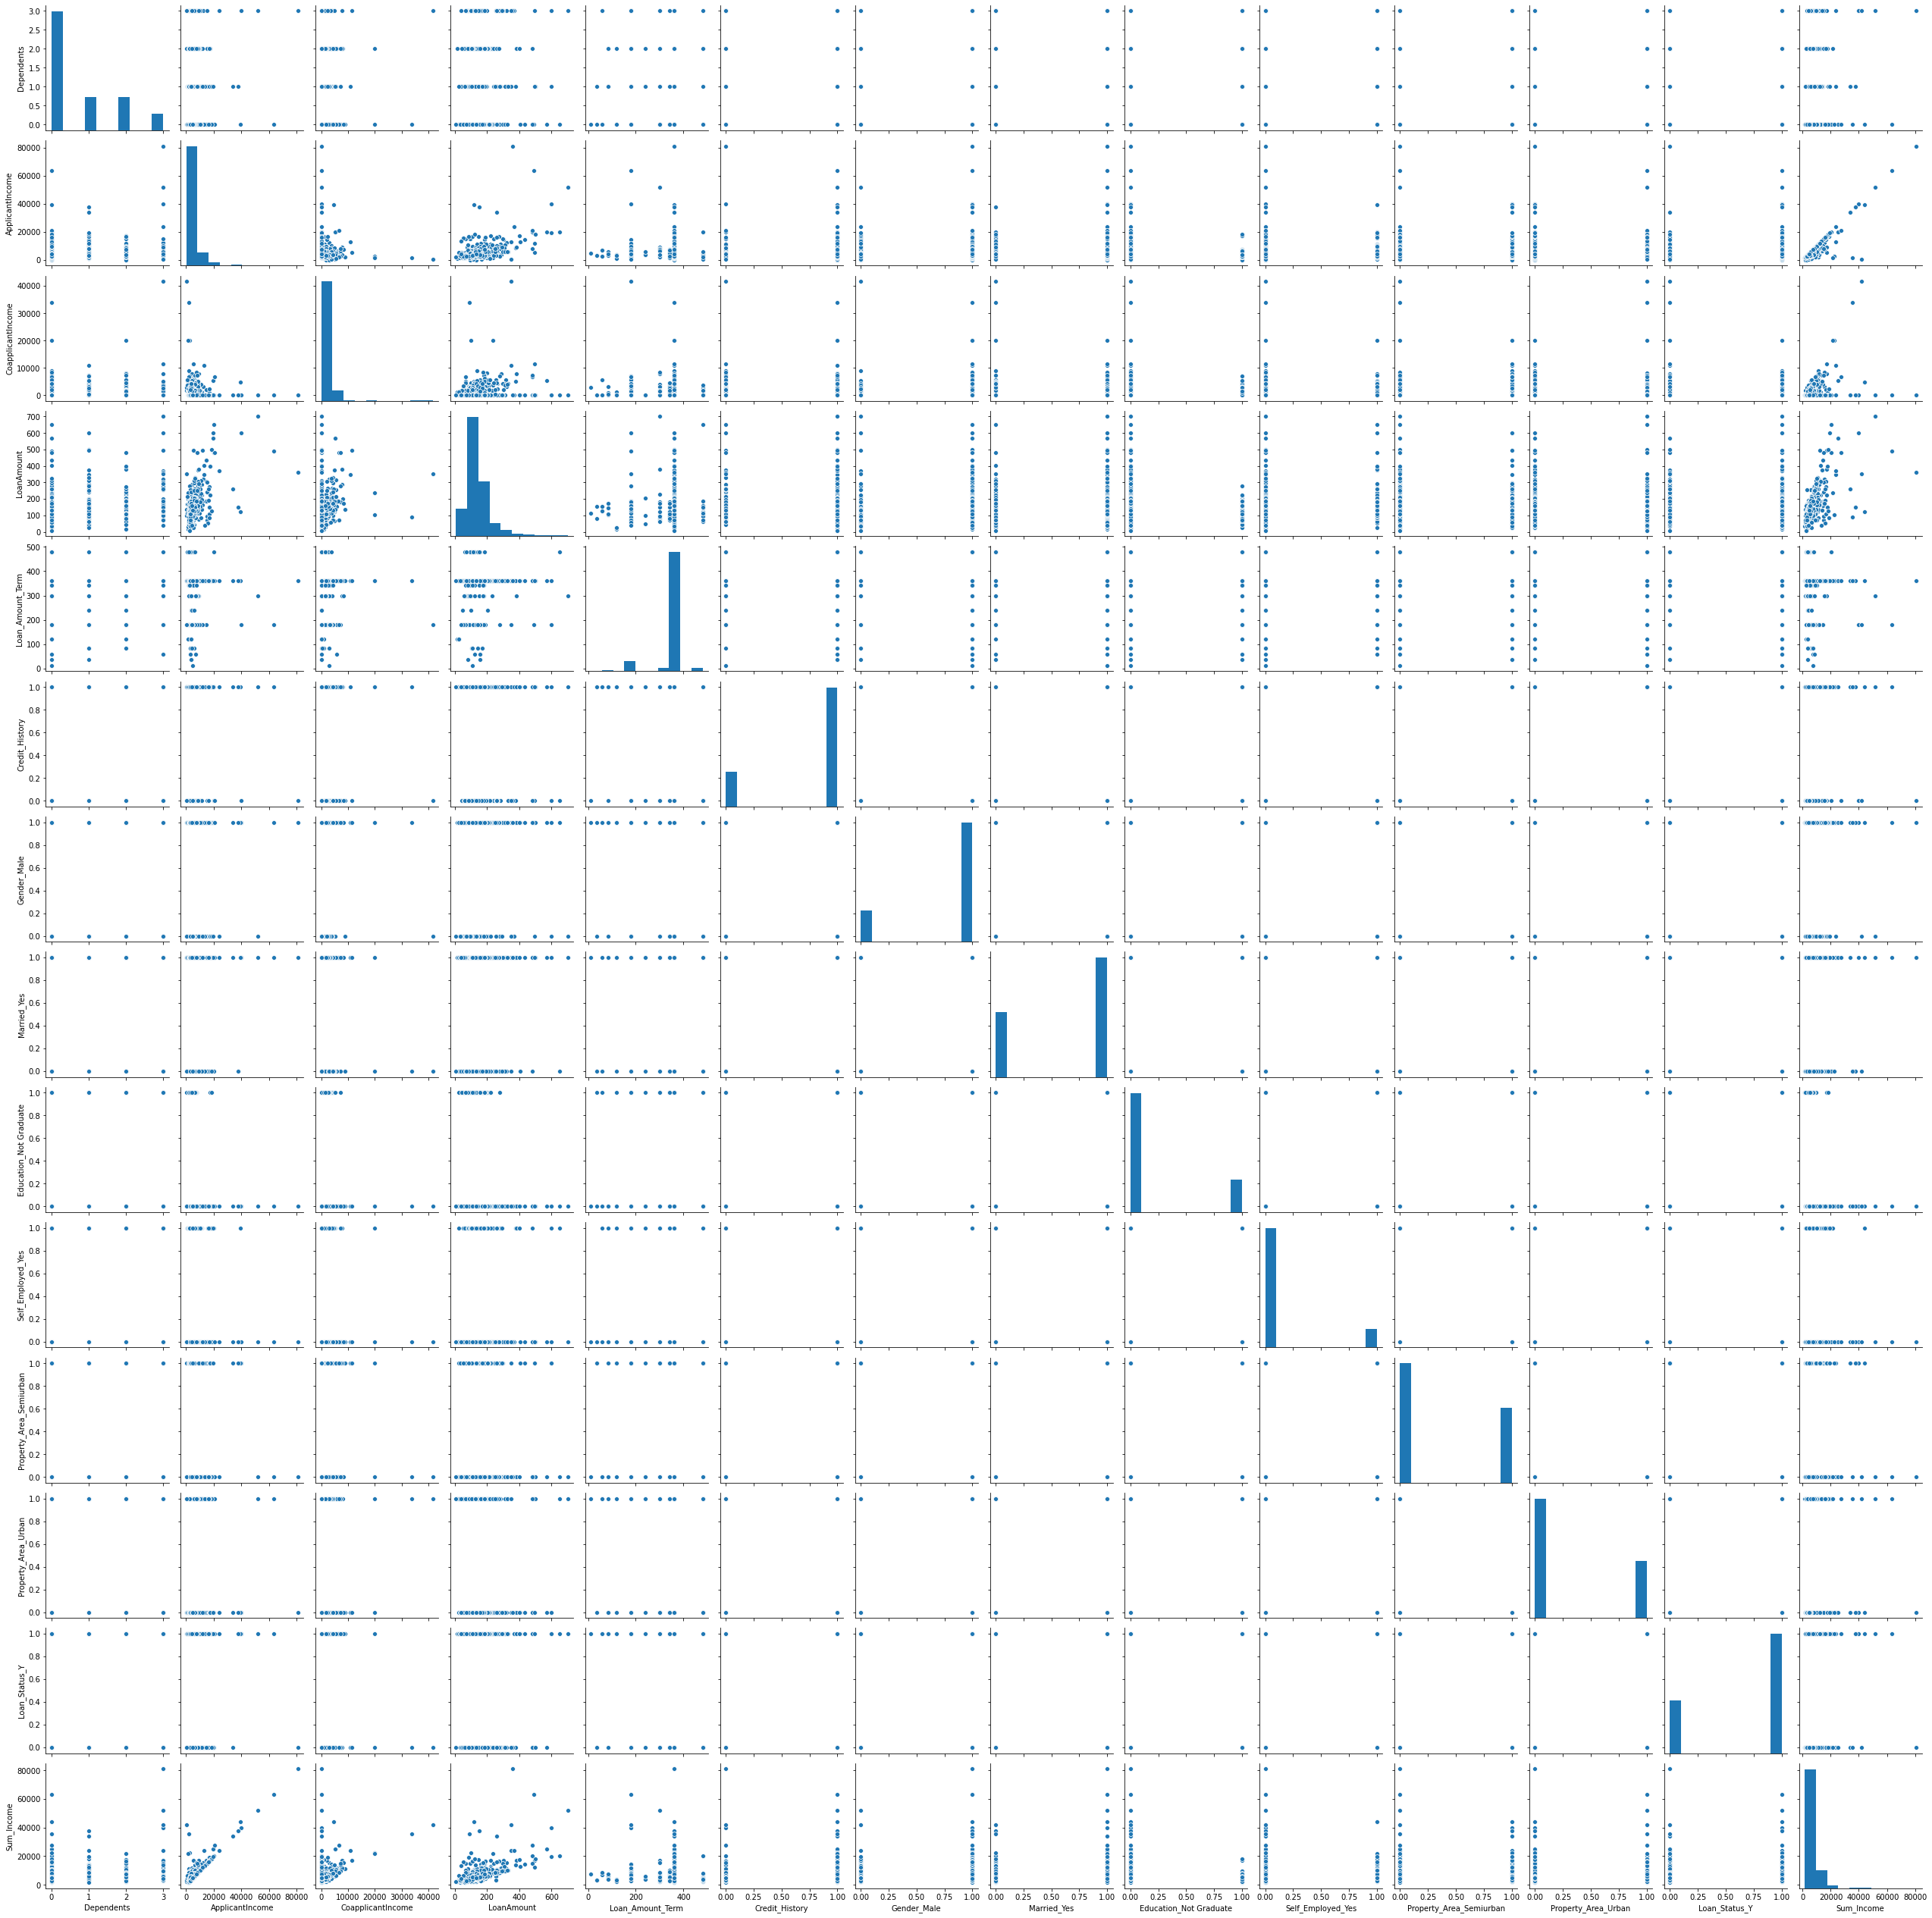

In [ ]:
seabornInstance.pairplot(df)

# Correlation Coefficients Heatmap

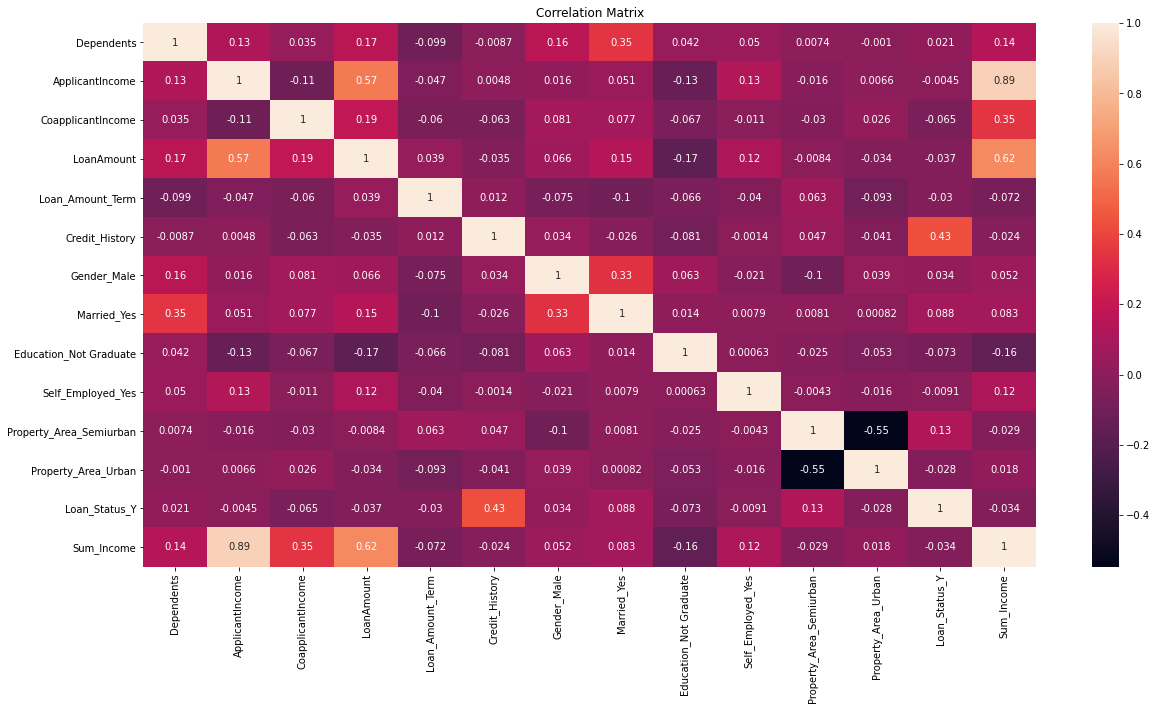

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Correlation Matrix')
seabornInstance.heatmap(df.corr(),annot=True)

By visualizing our data with Heatmap, we found a strong correlation between various features available in the dataset. Such as:
- Total Income is highly correlated to the loan amount.
- Credit history is highly correlated to the loan status.

But, It didn't provide us much clarity about the correlation between the other columns. So we used Feature Importance technique to get to know a score for the input features based on how useful they are at predicting our target variable. Here, our target variable is Loan Status.


# Feature Importance

In [ ]:
y = df['Loan_Status_Y']

In [ ]:
df.drop(['Loan_Status_Y'], axis=1, inplace=True)

[0.06092252 0.1473847  0.10705923 0.14908038 0.05601393 0.18057279
 0.02645388 0.02312279 0.02344945 0.0279955  0.02743346 0.02467759
 0.14583377]


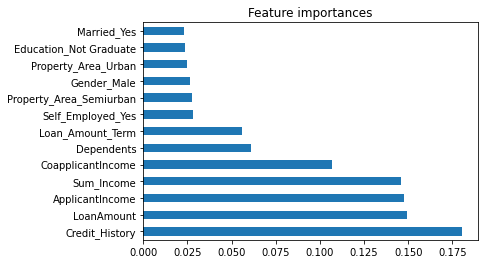

In [ ]:
model = ExtraTreesClassifier(criterion='gini') # “gini” for the Gini impurity and “entropy” for the information gain.
model.fit(df, y)
print(model.feature_importances_) # use inbuilt class feature_importances of tree based classifiers
# plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=df.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title("Feature importances")
plt.show()

In [ ]:
feat_importances

Dependents                 0.060923
ApplicantIncome            0.147385
CoapplicantIncome          0.107059
LoanAmount                 0.149080
Loan_Amount_Term           0.056014
Credit_History             0.180573
Gender_Male                0.026454
Married_Yes                0.023123
Education_Not Graduate     0.023449
Self_Employed_Yes          0.027996
Property_Area_Semiurban    0.027433
Property_Area_Urban        0.024678
Sum_Income                 0.145834
dtype: float64

It's obvious that credit history, sum of applicant and coapplicant incomes, and loan amount are the most important factors to predict the loan approval. So we are considering all the features which has above 50% of the importance.

# Train and Split data

In [ ]:
X = df[['Dependents', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History','Sum_Income']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
X = scaler.fit_transform(X)
print(X)


[[ 0.25283841 -0.21530913  0.27640833  0.54090334 -0.14651109]
 [-0.73842211 -0.94032807  0.27640833  0.54090334 -0.62025109]
 [-0.73842211 -0.30885996  0.27640833  0.54090334 -0.32276505]
 ...
 [ 0.25283841  1.24642259  0.27640833  0.54090334  0.19388896]
 [ 1.24409892  0.47462824  0.27640833  0.54090334  0.08215927]
 [-0.73842211 -0.15683986  0.27640833 -1.84875916 -0.37763368]]


Checking the average value of the 'Loan_Status_Y' column

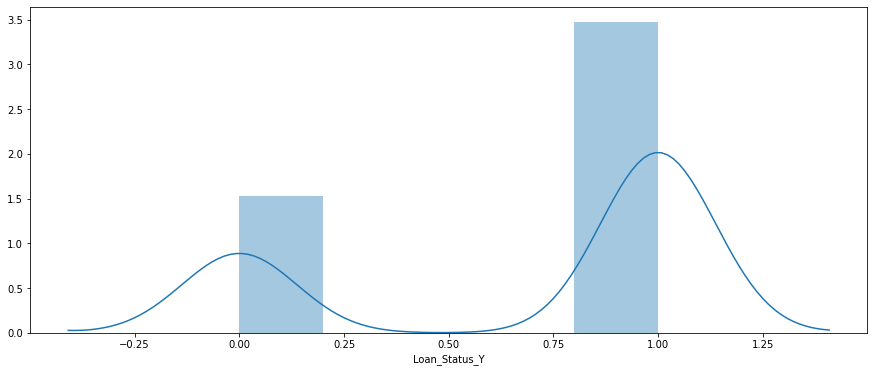

In [ ]:
plt.figure(figsize=(15,6))
plt.tight_layout()
seabornInstance.distplot(y)

 Splitting 80% of the data to the training set while 20% of the data to test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training the model

In [ ]:
regressor = LogisticRegression(random_state=0)  
regressor.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
regressor.score(X_train, y_train)

0.7801268498942917

Prediction on test data :

In [ ]:
y_pred = regressor.predict(X_test)

Difference between the actual value and predicted value :

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(40)
df1.head(30)

,Actual,Predicted
255,1,1
278,1,1
599,1,1
151,1,1
357,0,1
473,1,0
439,1,1
607,1,1
110,1,1
365,0,1


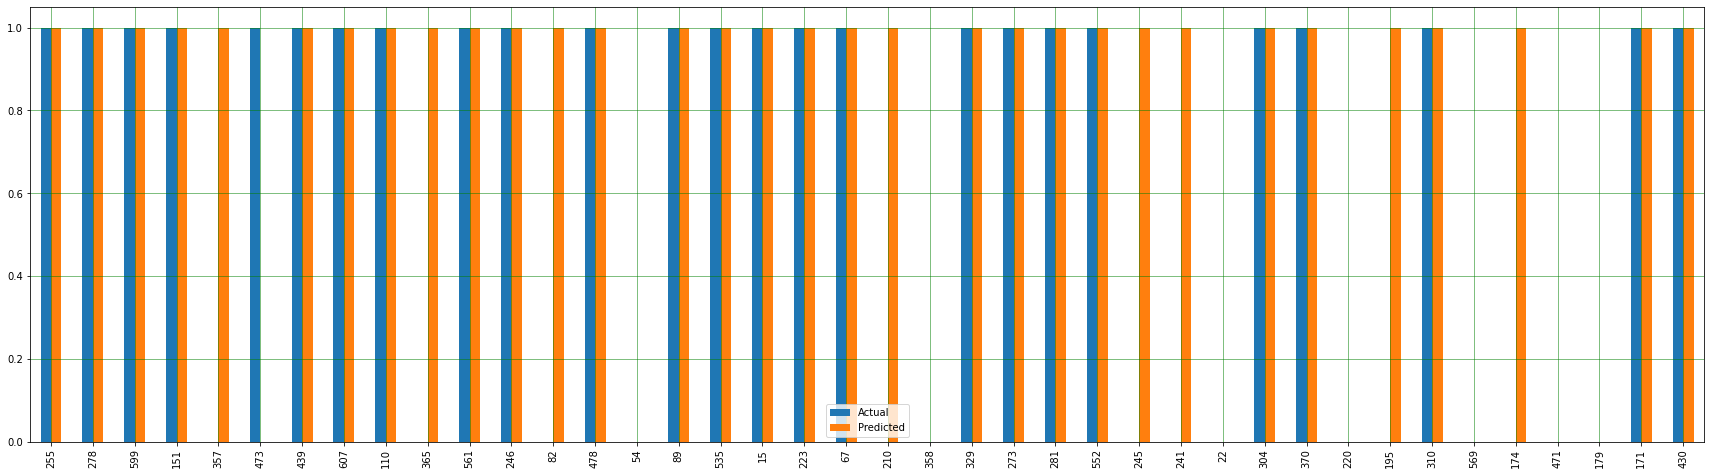

In [ ]:
df1.plot(kind='bar',figsize=(30,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19 21]
 [10 69]]
              precision    recall  f1-score   support

           0       0.66      0.47      0.55        40
           1       0.77      0.87      0.82        79

    accuracy                           0.74       119
   macro avg       0.71      0.67      0.68       119
weighted avg       0.73      0.74      0.73       119



In [ ]:
score = accuracy_score(y_test, y_pred)
print('\nAccuracy score:', score)


Accuracy score: 0.7394957983193278


In [ ]:
matrix = confusion_matrix(y_test, y_pred)
print('\nMatrix:', matrix)


Matrix: [[19 21]
 [10 69]]


# Sigmoid Function

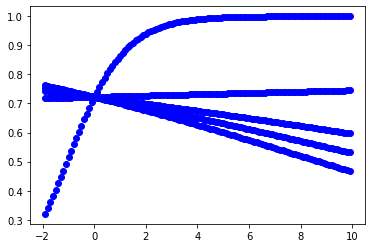

In [ ]:
def model(lr,x_train):
  return 1/(1 + np.exp(-(lr.intercept_+x_train*regressor.coef_)))
for i in range(1,120,1):
  plt.plot(i/10.0-2,model(regressor,i/10.0-2),'ro',color='blue')

With logistic regression we got the accuracy of 0.74 on prediction. This approach gave us good accuracy for our business case. But, we are performing data amalgamation and later we will compare this result with different predictive modelling approaches such as Decision Tree to pick the best algorithm for predicting bank loan approval.

References:

https://sites.google.com/sjsu.edu/appliedml/supervised?authuser=0

https://colab.research.google.com/drive/1qfDT6Cx62q6rmxBdl1fTpJGwaBIefSI2

https://towardsdatascience.com/building-a-logistic-regression-in-python-301d27367c24

https://ilparle.com/2017/04/21/plot-a-simple-sigmoid-function/

https://squall0032.tumblr.com/post/77300791096/plotting-a-sigmoid-function-using